# Assignment 2

## Importing Libraries

In [359]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

## Loading Dataset

In [360]:

# Load the data from the admitted data set
df = pd.read_excel("admitted.xlsx")
df

,الكلية,التخصص,السنة,الجنس,العدد
0,الشريعة,الشريعة,1436,F,741
1,الشريعة,الشريعة,1436,M,1506
2,الشريعة,الشريعة,1437,F,748
3,الشريعة,الشريعة,1437,M,1006
4,الشريعة,الشريعة,1438,F,782
...,...,...,...,...,...
443,الشريعة والدراسات الإسلامية,الأنظمة,1441,M,0
444,الشريعة والدراسات الإسلامية,الأنظمة,1442,F,0
445,الشريعة والدراسات الإسلامية,الأنظمة,1442,M,120
446,الشريعة والدراسات الإسلامية,الأنظمة,1443,F,0


## Renaming Columns to English

In [361]:
df.rename(columns = {'العدد':'number of students', 'الجنس':'gender','السنة':'year','التخصص':'department','الكلية':'college'}, inplace = True)

## Converting categorical Data in to Numeric data

In [362]:
df['department'] = pd.factorize(df['department'])[0]
df['college'] = pd.factorize(df['college'])[0]
df['gender'] = pd.factorize(df['gender'])[0]

In [363]:
df.head()

,college,department,year,gender,number of students
0,0,0,1436,0,741
1,0,0,1436,1,1506
2,0,0,1437,0,748
3,0,0,1437,1,1006
4,0,0,1438,0,782


In [364]:
X = df

## Plotting Department vs Number of Students

Text(0, 0.5, 'students')

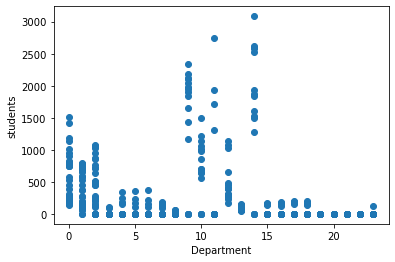

In [365]:

plt.figure(1)
plt.scatter(df.iloc[:,1],df.iloc[:,4], marker = 'o')
plt.xlabel('Department')
plt.ylabel('students')




# DBSCAN and Best eps and minPts

### Minimum Samples 

### Finding best Epsilon 

Text(0, 0.5, '4th Nearest Neighbours Distance')

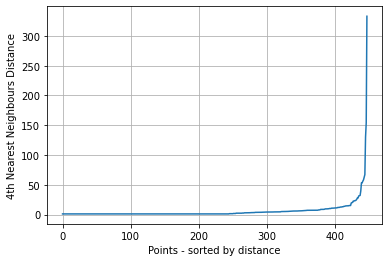

In [366]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

# Step 1: Calculate the average distance between each point in the data set and its 20 nearest neighbors (my selected MinPts value)
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Step2: Sort distance values by ascending value and plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid()
plt.xlabel('Points - sorted by distance')
plt.ylabel('4th Nearest Neighbours Distance')




The ideal value for ε will be equal to the distance value at the “crook of the elbow”, or the point of maximum curvature. This point represents the optimization point where diminishing returns are no longer worth the additional cost. This concept of diminishing returns applies here because while increasing the number of clusters will always improve the fit of the model, it also increases the risk that overfitting will occur.

## 1. K means and DB Scan

In [374]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
k_means_4_clusters = kmeans.fit_predict(X)

In [372]:
# DBSCAN using Minpts=4 and eps=8 (curvature)
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=20, min_samples=1)
dbscan.fit(X)
label = dbscan.labels_


## Plotting Department vs Number of Students - Clustered

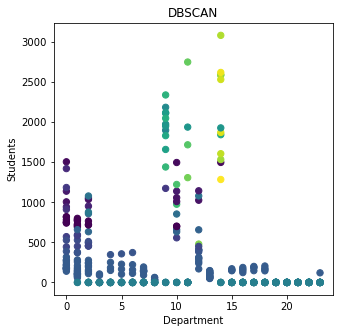

In [373]:
plt.figure(figsize=(5,5))
plt.scatter(X.iloc[:,1],X.iloc[:,4],c=label,s=40)
plt.xlabel('Department')
plt.ylabel('Students')
plt.title('DBSCAN')
plt.show()

## 2. Finding epsilon using silhouette

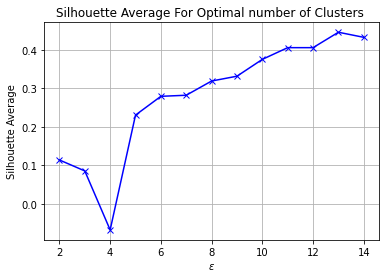

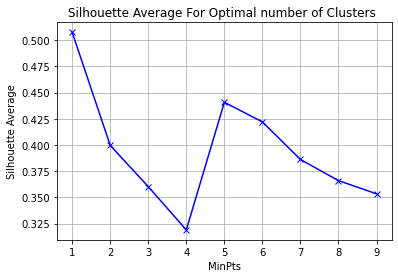

In [369]:
## Finding epsilon using silhouette

SS_distances= []
I = range(2,15)
for i in I:
       dbscan=DBSCAN(eps=i, min_samples=4)
       dbscan= dbscan.fit(X)
       score_db= metrics.silhouette_score(X, dbscan.labels_)
       SS_distances.append(score_db)

# plotting Silhouette for different clusters
plt.plot(I, SS_distances, 'bx-')
plt.xlabel('$ε$')
plt.ylabel('Silhouette Average')
plt.title('Silhouette Average For Optimal number of Clusters ')    
plt.grid()
plt.show()

# Finding Best Nearest Neighbours using e=8


SS_distances= []
I = range(1,10)
for i in I:
       dbscan=DBSCAN(eps=8, min_samples=i)
       dbscan= dbscan.fit(X)
       score_db= metrics.silhouette_score(X, dbscan.labels_)
       SS_distances.append(score_db)

# plotting Silhouette for different clusters

plt.plot(I, SS_distances, 'bx-')
plt.xlabel('MinPts')
plt.ylabel('Silhouette Average')
plt.title('Silhouette Average For Optimal number of Clusters ')    
plt.grid()





Optimal Minpts=1
Optimal $\epsilon$=13

## Plotting Department vs Number of Students - Clustered

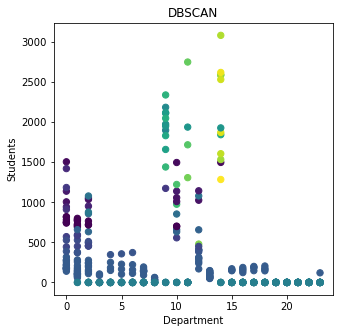

In [370]:
# Using optimal Minpts and $\epsilon$
dbscan=DBSCAN(eps=13, min_samples=1)
dbscan.fit(X)

plt.figure(figsize=(5,5))
plt.scatter(X.iloc[:,1],X.iloc[:,4],c=label,s=40)
plt.xlabel('Department')
plt.ylabel('Students')
plt.title('DBSCAN')
plt.show()

# K-means Clustering

Text(0.5, 1.0, 'Elbow Method For Optimal k')

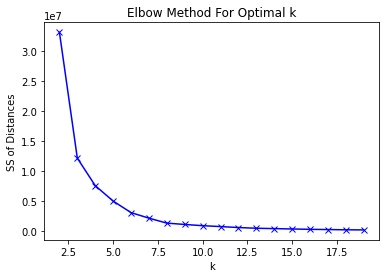

In [371]:
#Finding Best k using WSSE 
from sklearn.cluster import KMeans
SS_distances= []
I = range(2,20)
for i in I:
       k_means = KMeans(n_clusters=i)
       k_means= k_means.fit(X)
       SS_distances.append(k_means.inertia_)
   


centers = k_means.cluster_centers_

# plotting SSE distances (for each point to the nearest Center) versus number of k 
plt.plot(I, SS_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SS of Distances')
plt.title('Elbow Method For Optimal k')

## 3. Finding Bets K using Silhouette Ave

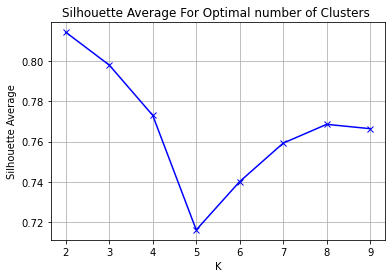

In [330]:
# Finding Bets K using Silhouette Ave
SS_distances= []
I = range(2,10)
for i in I:
       k_means = KMeans(n_clusters=i)
       k_means= k_means.fit(X)
       score_kmean= metrics.silhouette_score(X, k_means.labels_)
       SS_distances.append(score_kmean)

# plotting Silhouette for different clusters

plt.plot(I, SS_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Average')
plt.title('Silhouette Average For Optimal number of Clusters ')    
plt.grid()

##  Plotting Clusters and their centers

Text(0.5, 1.0, 'K Means')

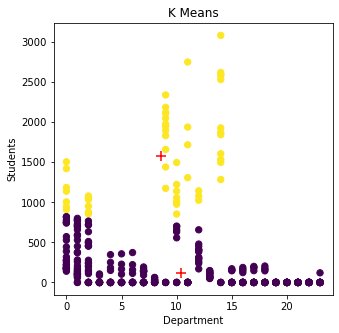

In [357]:
# Train k_means using optimal number of clusters
k_means = KMeans(n_clusters=2)
k_means= k_means.fit(X)


# Plot Clusters and their centers

label_Kmeans = k_means.labels_
centers = k_means.cluster_centers_

plt.figure(figsize=(5,5))
plt.scatter(X.iloc[:,1],X.iloc[:,4],c=label_Kmeans,s=40)
plt.scatter(centers[:,1], centers[:,4], color ='red', marker='+', s=100) 
plt.xlabel('Department')
plt.ylabel('Students')
plt.title('K Means')


# Hierarchal Clustering - Bonus Part

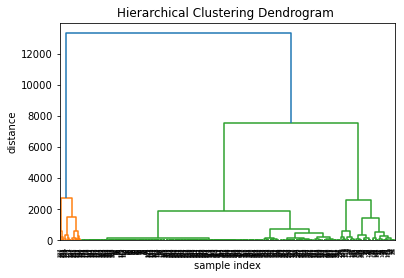

In [332]:

import scipy.cluster.hierarchy as sch

plt.title('Hierarchical Clustering Dendrogram ')
plt.xlabel('sample index')
plt.ylabel('distance')
# Show Dendrogram, show only the last p merged clusters
#dendrogram = sch.dendrogram(sch.linkage(X, method='ward'),distance_sort=True,truncate_mode='lastp',  p=20)

# Show Dendrogram whole
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'),distance_sort=True)


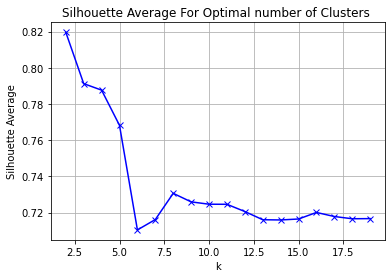

In [333]:
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

SS_distances= []
I = range(2,20)
for i in I:
       HC = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
       HC= HC.fit(X)
       score_H= metrics.silhouette_score(X, HC.labels_)
       SS_distances.append(score_H)

# plotting Silhouette for different clusters
plt.plot(I, SS_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Average')
plt.title('Silhouette Average For Optimal number of Clusters ')    
plt.grid()
#HC = AgglomerativeClustering(distance_threshold=40,n_clusters=None, affinity='euclidean', linkage='ward')


## 4. Validation  -- All three methods

In [334]:
# Validation  -- All three methods

from sklearn import metrics
score1 = metrics.silhouette_score(X, HC.labels_)
score2 = metrics.silhouette_score(X, dbscan.labels_)
score3 = metrics.silhouette_score(X, k_means.labels_)

print("Hierarchal: Silhoutte Score = ", score1)
print("DBSCAN:  Silhoutte Score = ", score2)
print("K-means: Silhoutte Score = ", score3)

Hierarchal: Silhoutte Score =  0.7166926170048643
DBSCAN:  Silhoutte Score =  0.5647460152350641
K-means: Silhoutte Score =  0.8144259237994138


## Analysis 
K-means clustering with n_clusters = 2 is better than other clustering methods used above because it classifies similar datapoints correctly in to single cluster. Silhoutte Score ranges from -1 to 1 and the silhouette score of 1 means that the clusters are very dense and nicely separated. The score of less than 0 means that data belonging to clusters may be incorrect. 
With clusters other than 2, the Silhoutte score decreases, indicating the clusters could be overlapping and not nicely separated.


## 5. PCA  

## Standardizing all features

In [335]:
from sklearn.preprocessing import StandardScaler

# normalize data
from sklearn import preprocessing
x = pd.DataFrame(preprocessing.scale(X),columns = df.columns) 
x

,college,department,year,gender,number of students
0,-2.511167,-1.416119,-1.527525,-1.0,0.854929
1,-2.511167,-1.416119,-1.527525,1.0,2.276064
2,-2.511167,-1.416119,-1.091089,-1.0,0.867932
3,-2.511167,-1.416119,-1.091089,1.0,1.347217
4,-2.511167,-1.416119,-0.654654,-1.0,0.931094
...,...,...,...,...,...
443,1.055418,1.772625,0.654654,1.0,-0.521622
444,1.055418,1.772625,1.091089,-1.0,-0.521622
445,1.055418,1.772625,1.091089,1.0,-0.298699
446,1.055418,1.772625,1.527525,-1.0,-0.521622


In [336]:
x

,college,department,year,gender,number of students
0,-2.511167,-1.416119,-1.527525,-1.0,0.854929
1,-2.511167,-1.416119,-1.527525,1.0,2.276064
2,-2.511167,-1.416119,-1.091089,-1.0,0.867932
3,-2.511167,-1.416119,-1.091089,1.0,1.347217
4,-2.511167,-1.416119,-0.654654,-1.0,0.931094
...,...,...,...,...,...
443,1.055418,1.772625,0.654654,1.0,-0.521622
444,1.055418,1.772625,1.091089,-1.0,-0.521622
445,1.055418,1.772625,1.091089,1.0,-0.298699
446,1.055418,1.772625,1.527525,-1.0,-0.521622


## Variance Ratio

In [337]:
import numpy as np
from sklearn.decomposition import PCA


my_model = PCA(n_components=4)
my_model.fit_transform(x)
exp_var_pca = my_model.explained_variance_ratio_
#print(my_model.explained_variance_)
print(my_model.explained_variance_ratio_)


[0.34349093 0.2097404  0.2        0.16398803]


## 6.  How many dimensions should we use.

In [339]:
# original_num_df the original numeric dataframe
# pca is the model
def create_importance_dataframe(pca, original_num_df):

    # Change pcs components ndarray to a dataframe
    importance_df  = pd.DataFrame(pca.components_)

    # Assign columns
    importance_df.columns  = original_num_df.columns

    # Change to absolute values
    importance_df =importance_df.apply(np.abs)

    # Transpose
    importance_df=importance_df.transpose()

    # Change column names again

    ## First get number of pcs
    num_pcs = importance_df.shape[1]

    ## Generate the new column names
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns  =new_columns

    # Return importance df
    return importance_df

# Call function to create importance df
importance_df  =create_importance_dataframe(my_model, x)

# Show first few rows
print(importance_df.head())

## PC4 top 10 important features
pc4_top_4_features = importance_df['PC4'].sort_values(ascending = False)[:4]
print(), print(f'PC4 top 4 feautres are \n')
print(pc4_top_4_features )


                         PC1       PC2           PC3       PC4
college             0.657873  0.142316  0.000000e+00  0.149427
department          0.631569  0.196986  6.268946e-17  0.319718
year                0.046625  0.691051  6.189560e-01  0.369967
gender              0.036743  0.544584  7.854257e-01  0.291553
number of students  0.405955  0.408436  1.595456e-15  0.808439

PC4 top 4 feautres are 

number of students    0.808439
year                  0.369967
department            0.319718
gender                0.291553
Name: PC4, dtype: float64


Keeping 4 components in the PCA Analysis, it is clear, Number of student is the most important feature and College is the least important. If we drop 'College', we still have meaningful analysis.
The top 3 features are
1. number of students    
2. year                  
3. department         

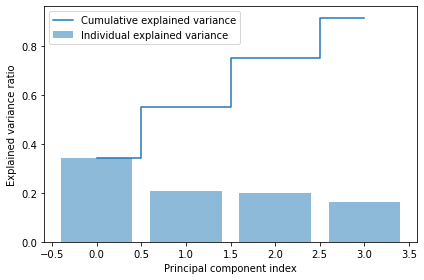

In [340]:

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## 7. Plot 3d dataset, visualize 3 important features.

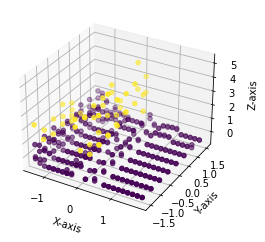

In [358]:
# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate the values
x_vals = x.iloc[:,1:2] # Department
y_vals = x.iloc[:,2:3] # year
z_vals = x.iloc[:,4:5] # number of students

# Plot the values
ax.scatter(x_vals, y_vals, z_vals, c = label_Kmeans, marker='o')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

In the 3d plot, 
- x axis = Department
- y axis = year
- z axis = Number of Students

we can see 2 clear clusters. 
